In [4]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [5]:
# Read feature names from the text file
with open('expl_hsg_data.txt', 'r') as f:
    lines = f.readlines()
    
# Extract feature names
feature_names = [line.split(':')[0].strip() for line in lines]

# Read values from the text file
with open('housing_data_lin_reg.txt', 'r') as f:
    lines = f.readlines()

# Prepare data for writing to CSV
data = [line.split() for line in lines]

# Write data to CSV
with open('housing_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(feature_names)
    writer.writerows(data)


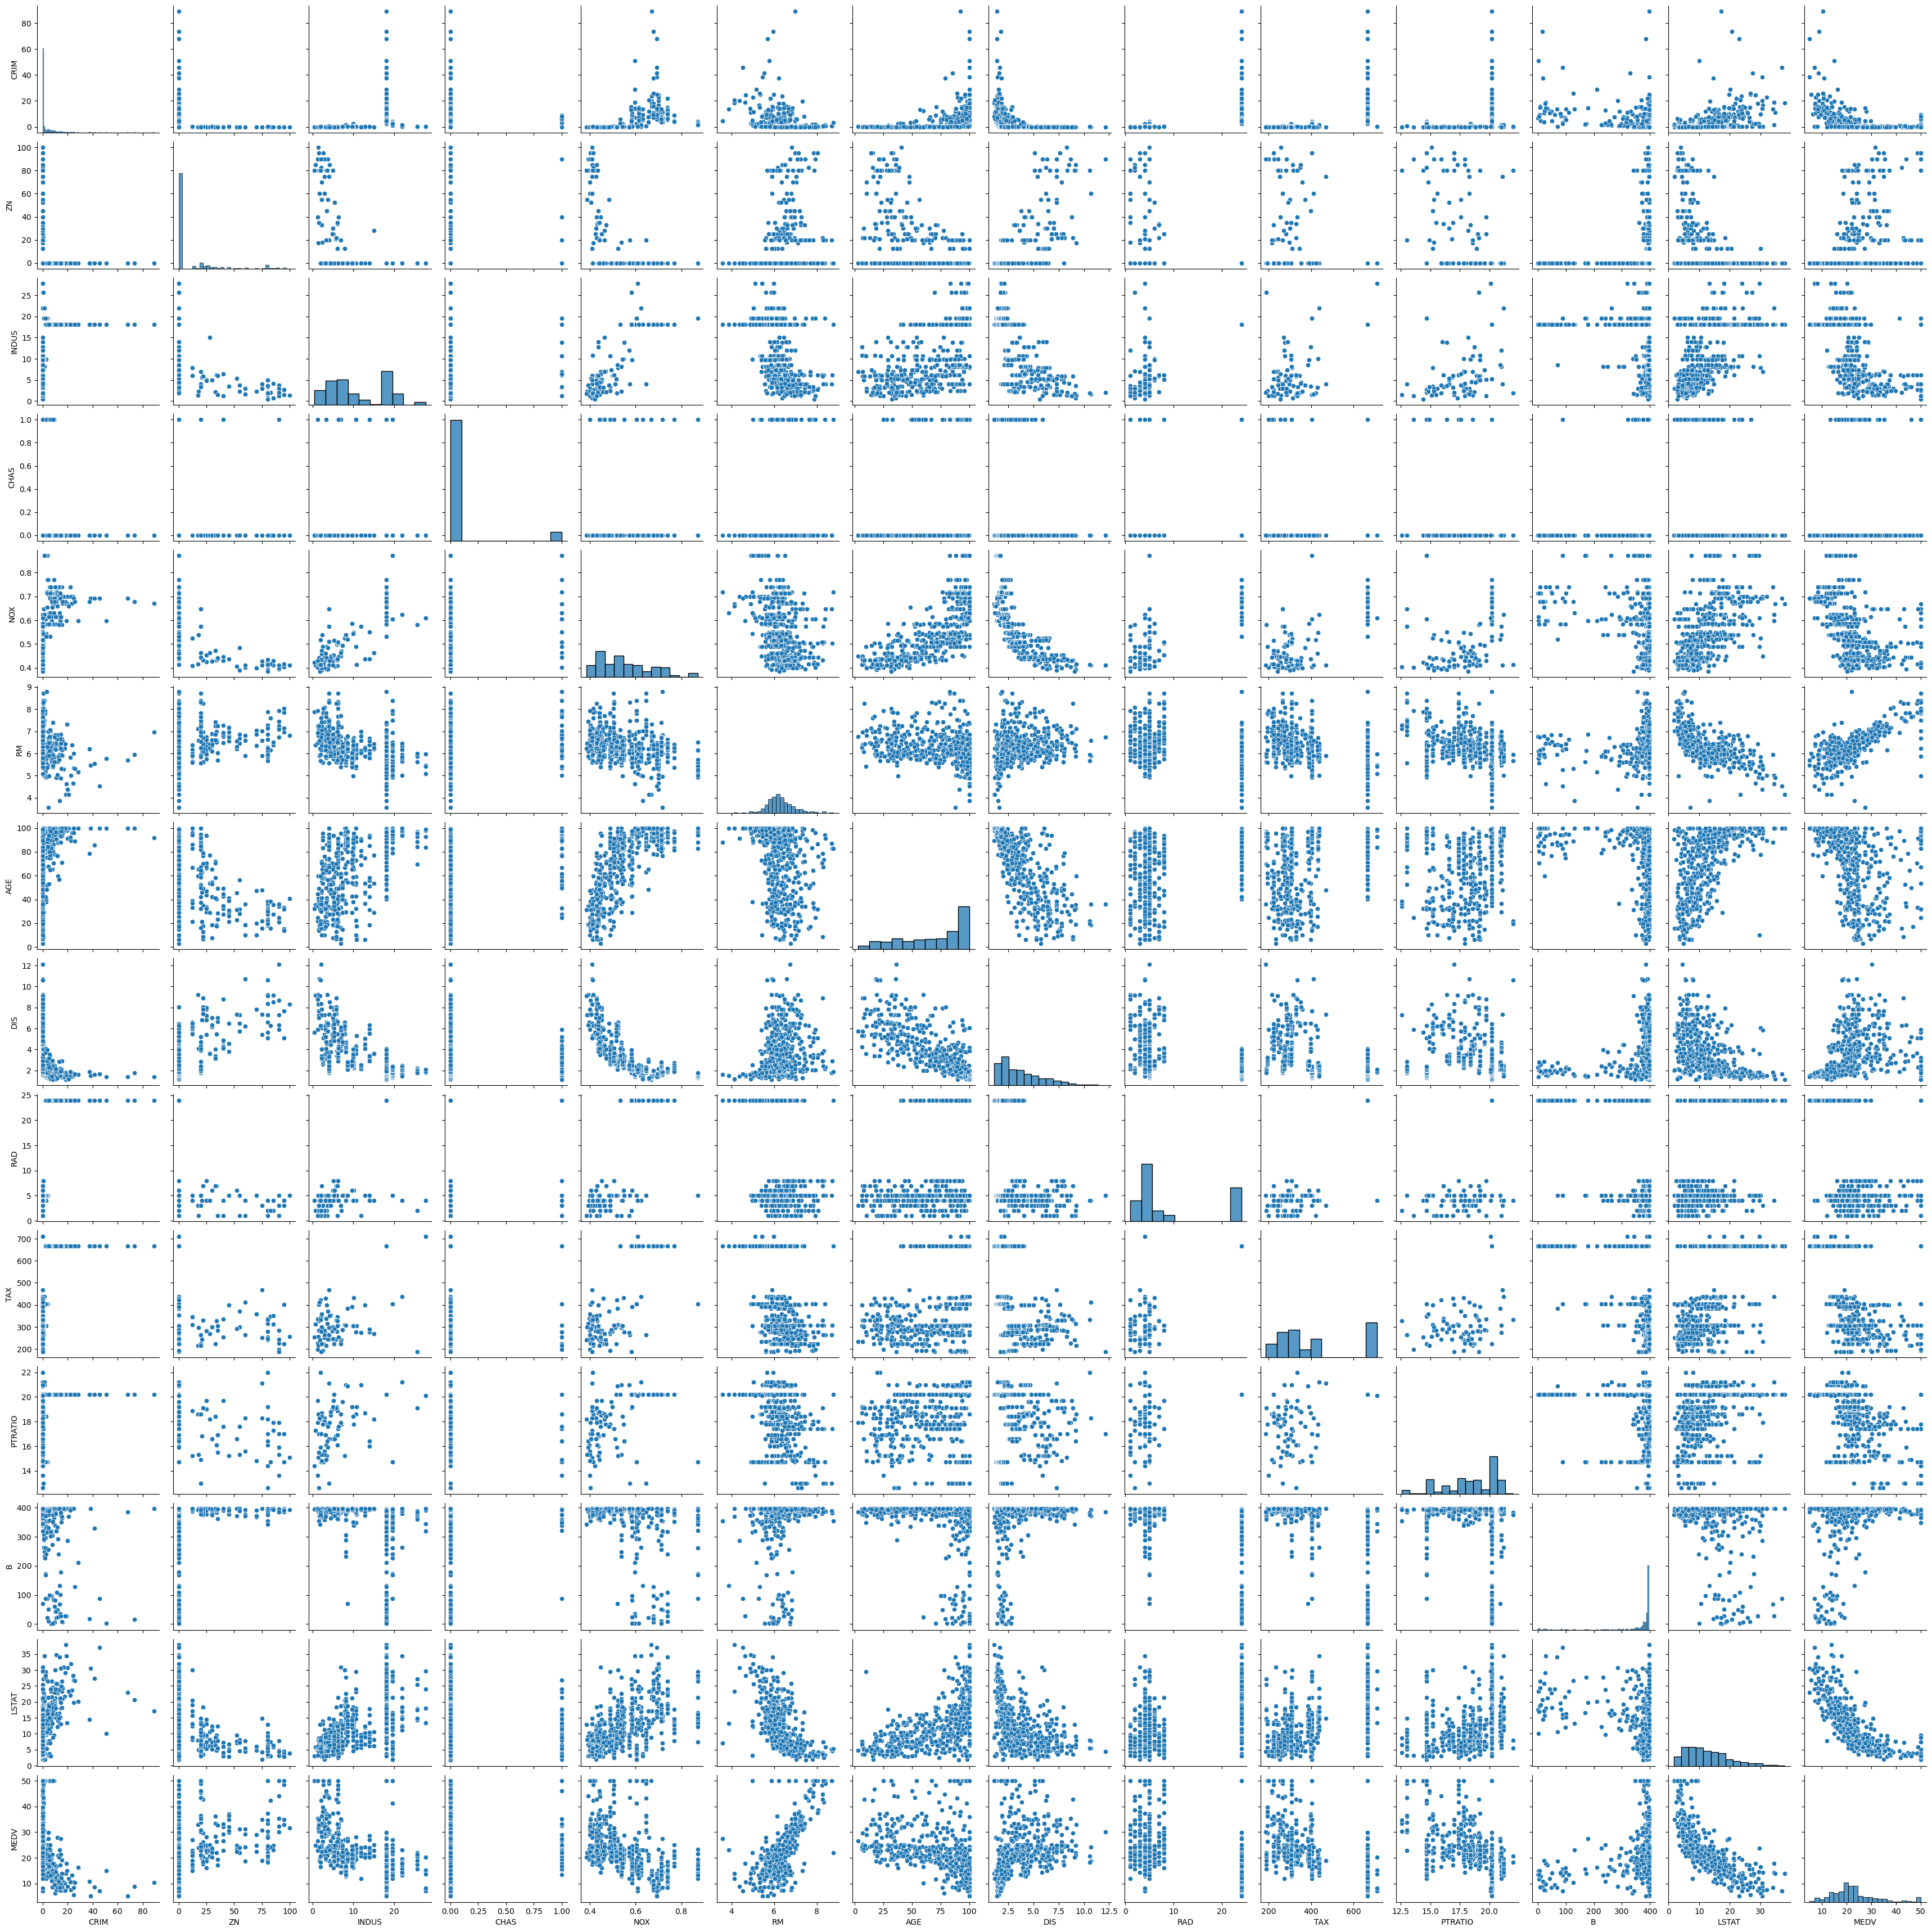

In [6]:
df=pd.read_csv('housing_data.csv')

columns = df.columns.tolist()

# Create the scatterplot matrix
sns.pairplot(df[columns])

# Display the plot
plt.show()

In [7]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [33]:
df=df[df['CRIM']<45]

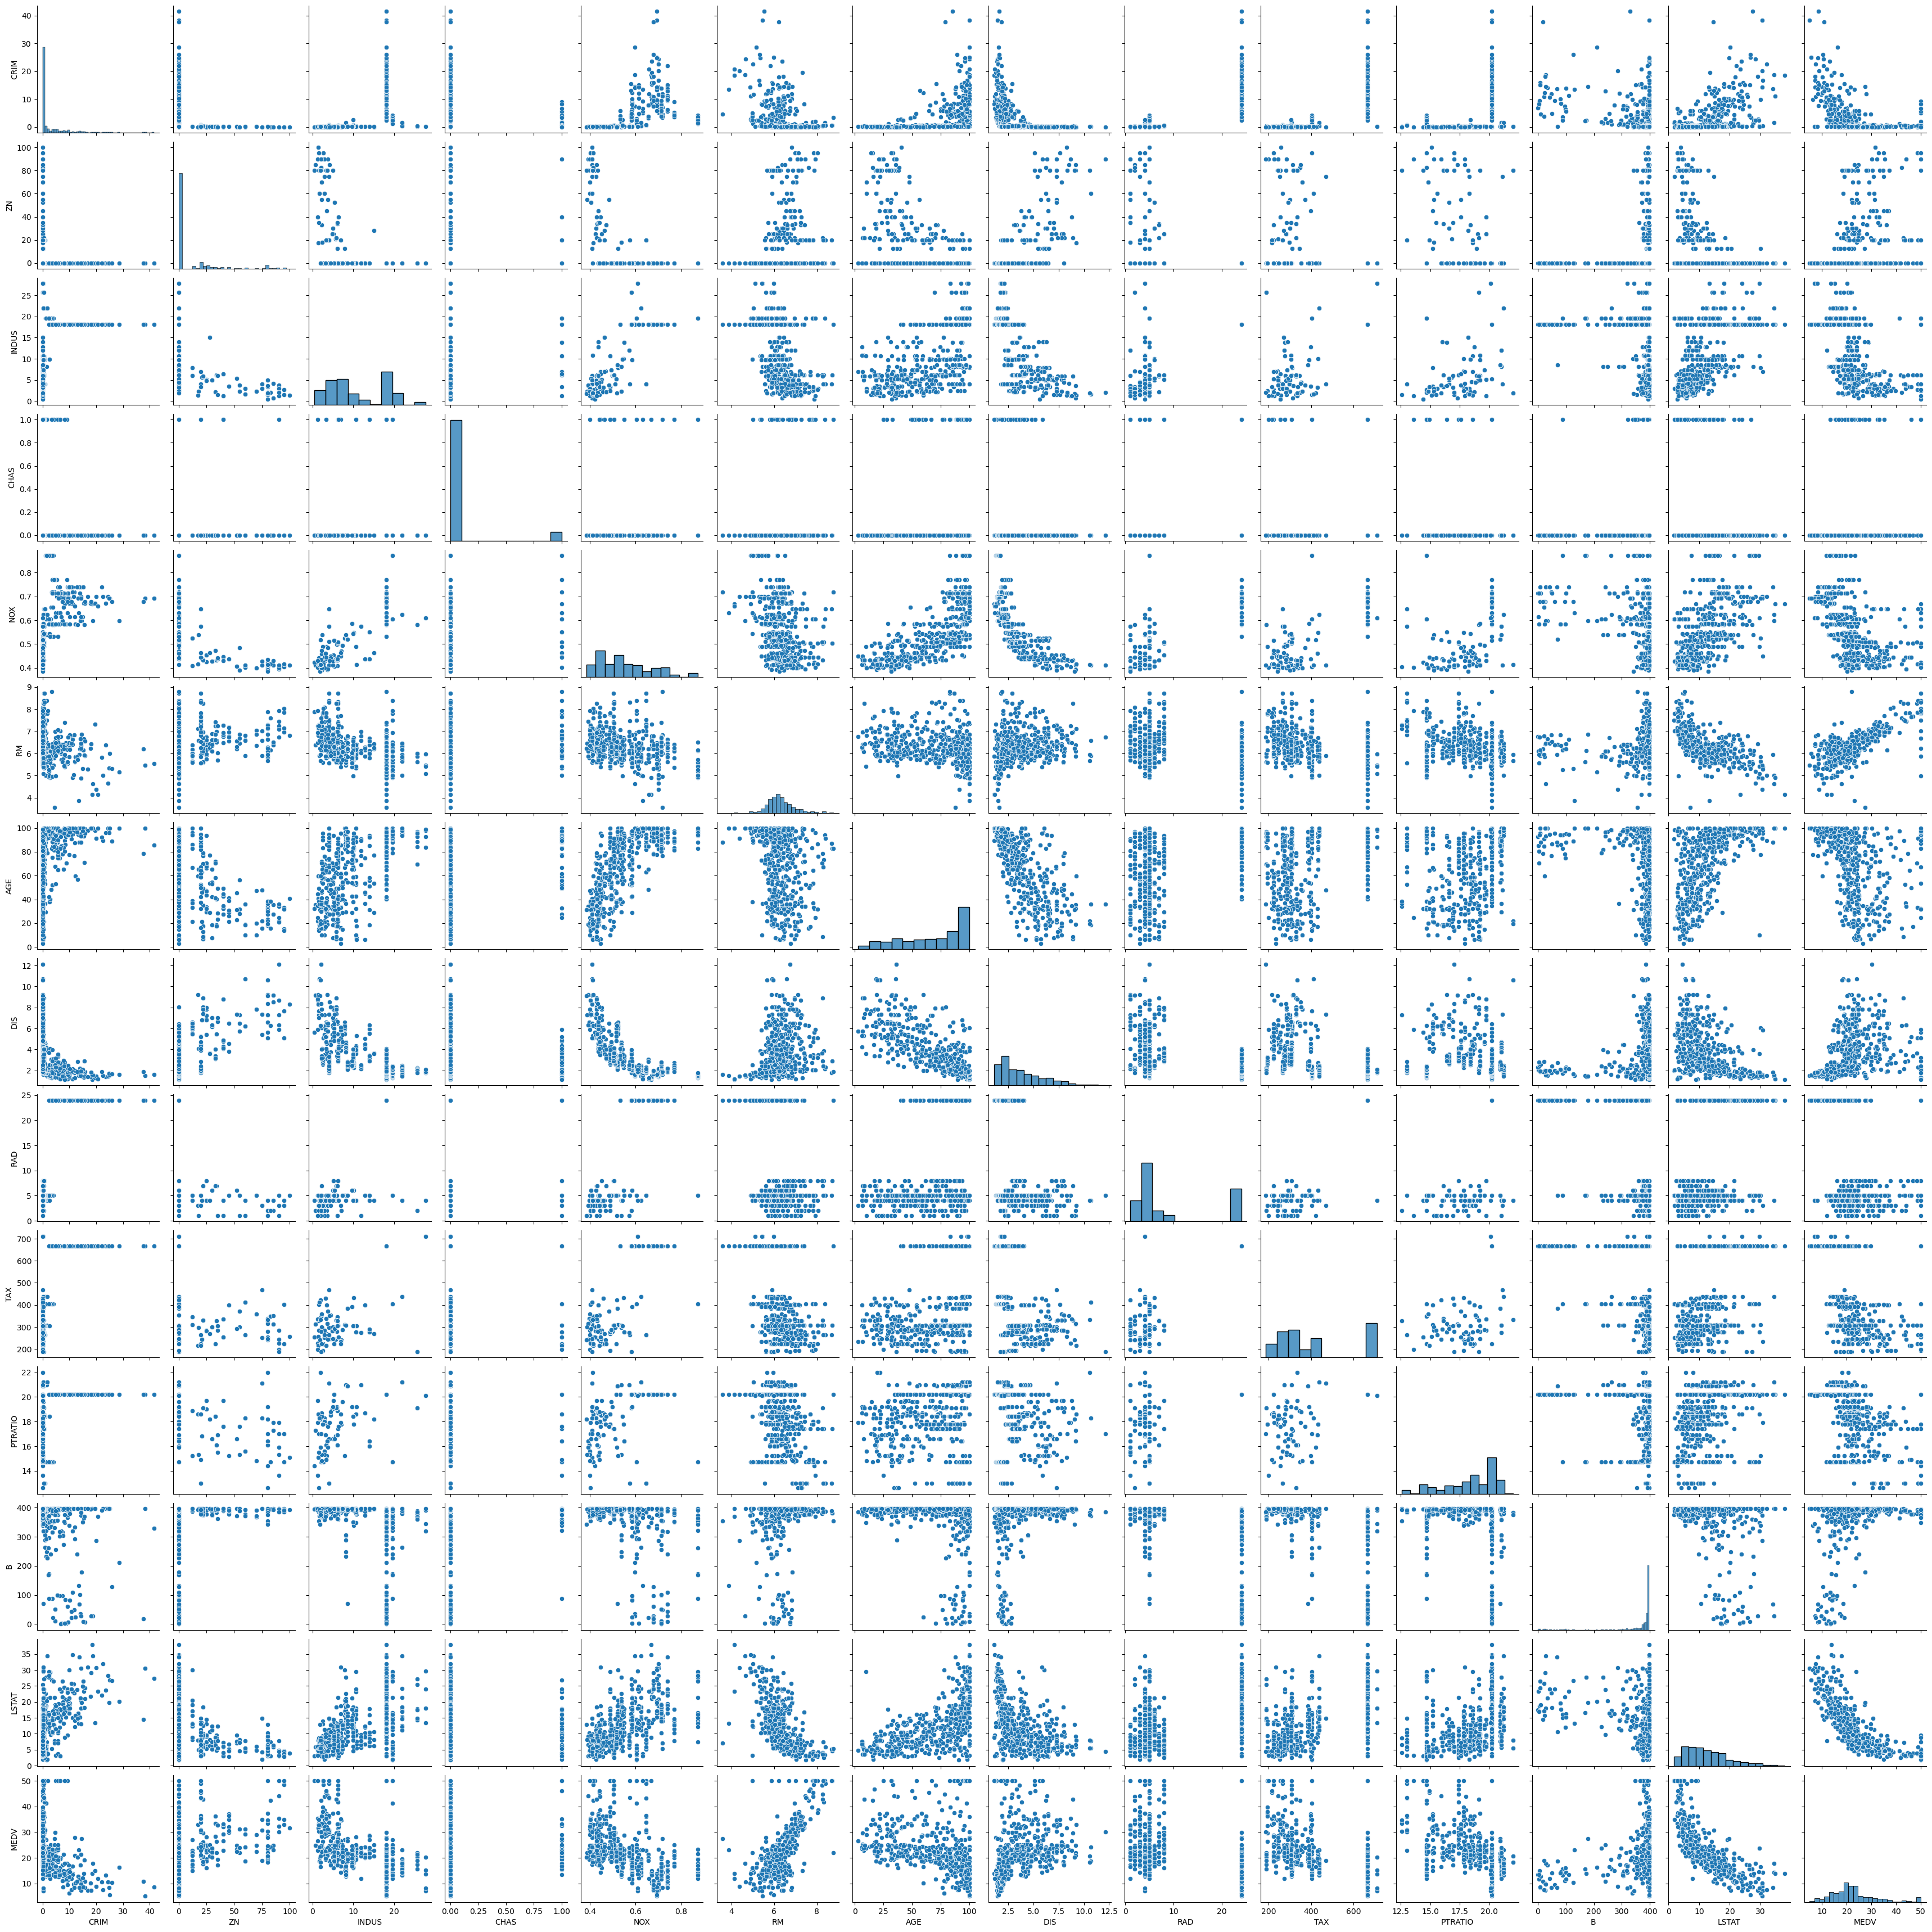

In [35]:
columns = df.columns.tolist()

# Create the scatterplot matrix
sns.pairplot(df[columns])

# Display the plot
#plt.show()

In [36]:
# corealtion matrix

features=['RM','AGE','DIS','LSTAT','NOX','MEDV']
subset_df=df[features]

In [37]:
correlation_matrix=np.corrcoef(subset_df.values.T)
correlation_matrix

array([[ 1.        , -0.23502811,  0.20073534, -0.60976095, -0.29869472,
         0.69739886],
       [-0.23502811,  1.        , -0.74509898,  0.60145562,  0.72914645,
        -0.36776007],
       [ 0.20073534, -0.74509898,  1.        , -0.49455698, -0.76734793,
         0.23857857],
       [-0.60976095,  0.60145562, -0.49455698,  1.        ,  0.58801607,
        -0.73576298],
       [-0.29869472,  0.72914645, -0.76734793,  0.58801607,  1.        ,
        -0.41912069],
       [ 0.69739886, -0.36776007,  0.23857857, -0.73576298, -0.41912069,
         1.        ]])

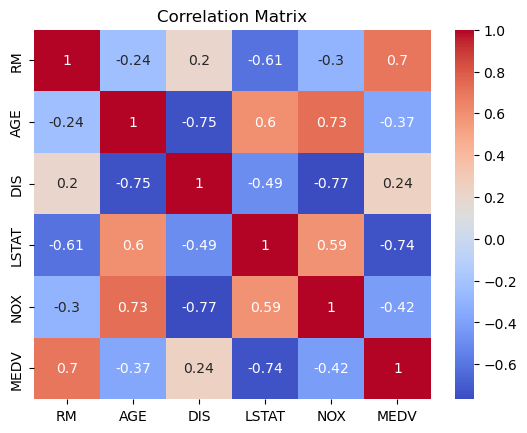

In [38]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=features, yticklabels=features)

# Set the plot title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [39]:
x=subset_df['RM']
y=subset_df['MEDV']
# y_reshaped = y.reshape(-1, 1)
x_reshaped = np.array(x.values).reshape(-1, 1)
y_reshaped = np.array(y.values).reshape(-1, 1)


In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_reshaped)
# y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
y_scaled = scaler.fit_transform(y_reshaped).flatten()


In [41]:
model = LinearRegression()

In [42]:
model.fit(X_scaled, y_scaled)
slope = model.coef_[0]
intercept = model.intercept_

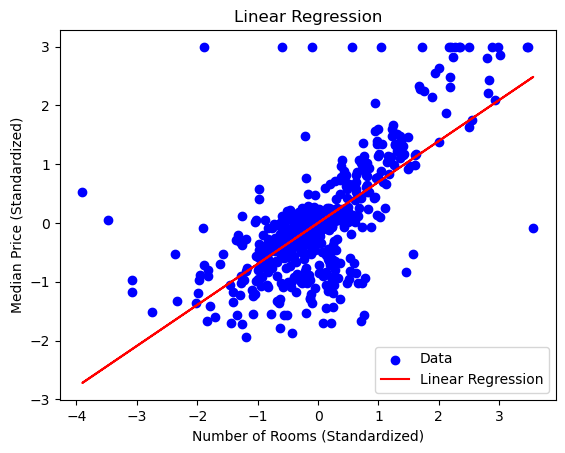

slope = 0.6973988642805273
intercept = 9.379505023244129e-17


In [43]:
plt.scatter(X_scaled,y_scaled,color='blue', label='Data')
plt.plot(X_scaled, slope * X_scaled + intercept, color='red', label='Linear Regression')

plt.title('Linear Regression')
plt.xlabel('Number of Rooms (Standardized)')
plt.ylabel('Median Price (Standardized)')
plt.legend()
plt.show()
print(f'slope = {slope}')
print(f'intercept = {intercept}')